In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("./data/data_days.csv")
df

,Student_ID,Age,Gender,Lifestyle_Habits,Day,Sleep_Hours,Stress_Level,Study_Hours,Screen_Time_Post_10PM,Physical_Activity_Minutes,Mood_Score,Sleep_Debt,Stress_Per_Study_Hour,Burnout_Risk_Score,Overall_Wellbeing_Score,Sleep_Quality_Score,Mental_Fatigue_Score
0,S00001_D003,25,Female,Night Owl,3,6.694939,8,4.611798,0.960507,101,8.423197,0.561922,1.73,0.14,8.28,6.12,0.86
1,S00001_D007,25,Female,Night Owl,7,6.683871,5,6.488627,4.291530,55,6.334042,1.170893,0.77,-0.16,6.49,6.34,1.75
2,S00001_D014,25,Female,Night Owl,14,6.587254,6,6.147315,2.125834,91,5.315147,2.775815,0.98,3.46,1.86,6.07,4.07
3,S00001_D021,25,Female,Night Owl,21,6.928135,5,5.035545,2.753121,54,5.302500,2.355538,0.99,2.05,3.25,6.57,3.37
4,S00001_D030,25,Female,Night Owl,30,7.036192,8,4.391436,1.086402,85,4.987899,2.291050,1.82,5.30,-0.31,6.51,5.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,S01095_D030,19,Female,Athlete,30,6.013780,3,5.363681,4.013505,66,7.225866,1.886527,0.56,-2.34,9.57,5.68,0.22
9851,S01095_D045,19,Female,Athlete,45,6.524648,8,5.769607,2.792254,33,3.403293,2.988014,1.39,7.58,-4.18,6.31,7.09
9852,S01095_D090,19,Female,Athlete,90,7.092886,6,5.437663,2.439104,23,2.536204,2.637553,1.10,6.10,-3.56,6.87,6.78
9853,S01095_D182,19,Female,Athlete,182,6.977922,7,4.777371,4.312982,43,4.991345,2.910722,1.47,4.92,0.07,6.67,4.96


In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender
# df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Female=0, Male=1, Other=2

# Encode Lifestyle_Habits (optional)
df["Lifestyle_Score"] = LabelEncoder().fit_transform(df["Lifestyle_Habits"])

features = [
    "Age",  
    "Sleep_Hours", 
    "Study_Hours",
    "Screen_Time_Post_10PM", 
    "Physical_Activity_Minutes", 
    "Mood_Score",
    "Sleep_Debt", 
    "Day", 
    "Lifestyle_Score"
]

target = [
    "Burnout_Risk_Score", 
    "Stress_Level", 
    "Stress_Per_Study_Hour",
    "Overall_Wellbeing_Score", 
    "Sleep_Quality_Score", 
    "Mental_Fatigue_Score"
]



In [4]:
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X, y)


,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [6]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))



R² Score: 0.9563853111967534
RMSE: 0.3003955886727053


In [7]:
import pandas as pd

# Base user input
base_user = {
    "Age": 22,
    "Sleep_Hours": 6.5,
    "Study_Hours": 8.0,  
    "Screen_Time_Post_10PM": 5.2,
    "Physical_Activity_Minutes": 30,
    "Mood_Score": 5.8,
    "Sleep_Debt": 1.4 , 
    "Day": 14 , # Will be overwritten by loop
    "Lifestyle_Score":3

    
}

# Days to forecast
future_days = [3, 7, 14, 21, 30, 45, 90, 182, 365]

# Create forecast DataFrame
forecast_df = pd.DataFrame([
    {**base_user, "Day": d} for d in future_days
])

# Predict multiple scores
predicted_outputs = model.predict(forecast_df)

# Define target column names (same order used during training)
output_labels = [
    "Burnout_Risk_Score", 
    "Stress_Level", 
    "Stress_Per_Study_Hour",
    "Overall_Wellbeing_Score", 
    "Sleep_Quality_Score", 
    "Mental_Fatigue_Score"
]

# Show results
for day, scores in zip(future_days, predicted_outputs):
    print(f"\n📅 Day {day}")
    for label, score in zip(output_labels, scores):
        print(f"   🔹 {label}: {round(score, 2)}")



📅 Day 3
   🔹 Burnout_Risk_Score: 0.68
   🔹 Stress_Level: 4.8
   🔹 Stress_Per_Study_Hour: 0.73
   🔹 Overall_Wellbeing_Score: 4.41
   🔹 Sleep_Quality_Score: 6.29
   🔹 Mental_Fatigue_Score: 2.79

📅 Day 7
   🔹 Burnout_Risk_Score: 1.8
   🔹 Stress_Level: 5.92
   🔹 Stress_Per_Study_Hour: 0.73
   🔹 Overall_Wellbeing_Score: 3.76
   🔹 Sleep_Quality_Score: 6.29
   🔹 Mental_Fatigue_Score: 3.17

📅 Day 14
   🔹 Burnout_Risk_Score: 2.22
   🔹 Stress_Level: 6.54
   🔹 Stress_Per_Study_Hour: 0.78
   🔹 Overall_Wellbeing_Score: 3.52
   🔹 Sleep_Quality_Score: 6.29
   🔹 Mental_Fatigue_Score: 3.28

📅 Day 21
   🔹 Burnout_Risk_Score: 2.31
   🔹 Stress_Level: 6.55
   🔹 Stress_Per_Study_Hour: 0.76
   🔹 Overall_Wellbeing_Score: 3.44
   🔹 Sleep_Quality_Score: 6.29
   🔹 Mental_Fatigue_Score: 3.37

📅 Day 30
   🔹 Burnout_Risk_Score: 2.32
   🔹 Stress_Level: 6.76
   🔹 Stress_Per_Study_Hour: 0.78
   🔹 Overall_Wellbeing_Score: 3.24
   🔹 Sleep_Quality_Score: 6.29
   🔹 Mental_Fatigue_Score: 3.41

📅 Day 45
   🔹 Burnout_Risk_S

C:\Users\hp\AppData\Local\Temp\ipykernel_11312\1634593270.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


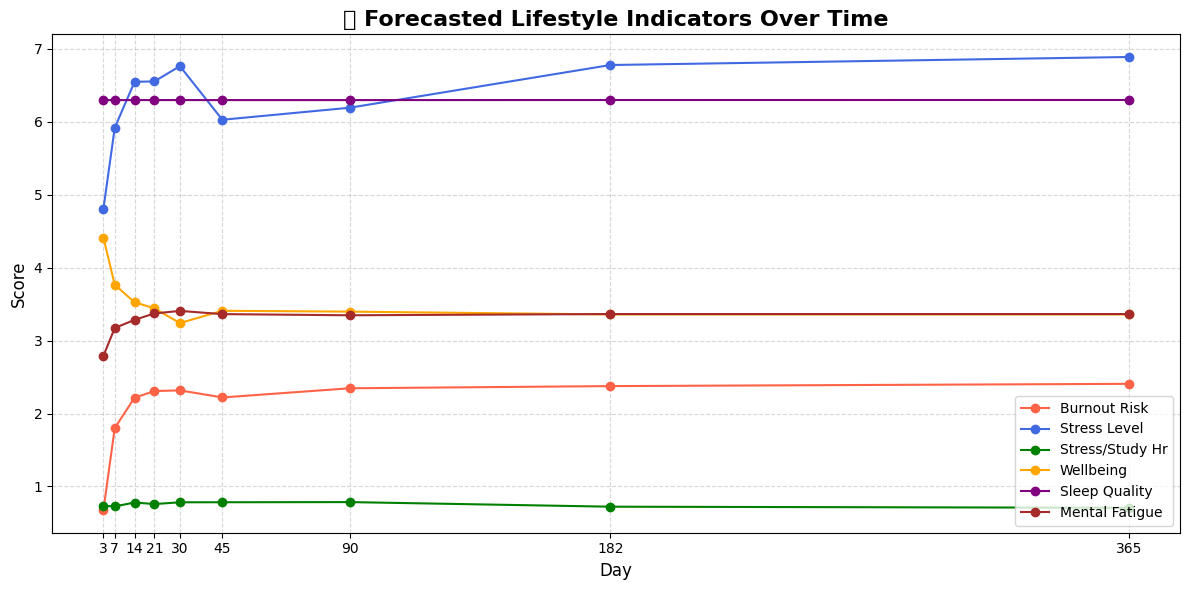

In [8]:
# Assume `predicted_outputs` is a NumPy array of shape (9 days, 6 scores)
target_names = [
    "Burnout Risk",
    "Stress Level",
    "Stress/Study Hr",
    "Wellbeing",
    "Sleep Quality",
    "Mental Fatigue"
]

colors = ['tomato', 'royalblue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(12, 6))

for i in range(predicted_outputs.shape[1]):
    plt.plot(future_days, predicted_outputs[:, i], marker='o', label=target_names[i], color=colors[i])

plt.title("📉 Forecasted Lifestyle Indicators Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Day", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(future_days)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
with open("days_trainer.pkl", "wb") as f:
    pickle.dump(model, f)